# **Practical assignment for Topic 5**



In your assigmnet, you will use the following **data** (*do not modify the code*):

In [7]:
### DO NOT MODIFY THIS CODE. JUST RUN IT.

from sklearn.datasets import make_blobs

# creating the dataset
X, y = make_blobs(n_samples=70, centers=[(0, 0), (3, 4), (2, -5), (6, 3), (8, -1), (6, -6)], n_features=2, cluster_std=1.5, random_state=42)
y[y == 2] = 1
y[y == 3] = 0
y[y == 4] = 1
y[y == 5] = 0

# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Your assignment consists of **two tasks**:

**Task 1**
* **Step 1.** Plot the dataset in a 2D plot.
* **Step 2.** Use 10-fold cross-validation to compute macro-averaged F1-score and Accuracy measure evaluating 32 models that you get by creating polynomials from degree 1 to 4 and regularizing each of them by the following C values: `[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]` (don't worry if you get a couple of warning messages about convergence). Print all 32 F1-scores and Accuracies on screen. Store all 32 F1-scores in a 2D array.
* **Step 3.** Use the array from Step 2 to plot a single diagram showing dependence of F1 on C for all four polynomial degrees. In the diagram plot four curves (one for each polynomial degree). The horizontal axis (C) should be log-scaled.
* **Step 4.** Plot four diagrams, in each showing the data points as well as the decision thresholds for one of the four polynomial degrees when its best C value is used. If you know how to plot a heatmap, you may also plot a heatmap with Degree vs. C axes. A heatmap sometimes can be more informative.

**Task 2**
* Write conclusions about the plotted diagrams, especially the F1 vs. C diagram, and printed F1 and Accuracy values. Which degree together with which C value is the best? Remember that analyzing your results is very important.
<br>

*While doing the tasks you are allowed to use only those function libraries and only those functions that we already have used in this and previous notebooks of the course. The exception is plotting a heatmap, if you decide to do that.*

**After the tasks are done, submit this file. Do not clear it's output - all print-outs and diagrams should be left in the file.**

### Task 1
##### Step 1 : Plot the dataset in a 2D plot.

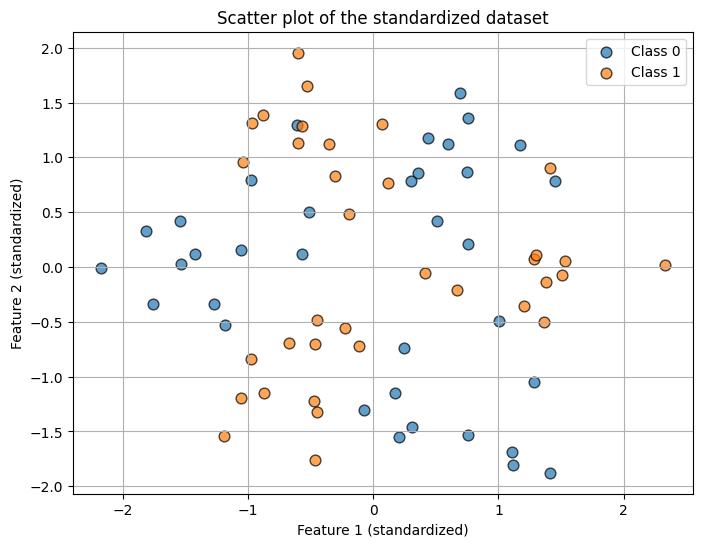

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# We already have X and y from the previous cell. Here we plot them on a 2D scatter chart.
# Matplotlib draws the graph, and NumPy makes it easy to work with the labels.
unique_labels = np.unique(y)  # This finds the different class labels present in y.

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes to draw on.
for label in unique_labels:
    class_points = X[y == label]  # Select only the points that belong to the current class.
    ax.scatter(
        class_points[:, 0],
        class_points[:, 1],
        label=f'Class {label}',
        s=60,
        alpha=0.7,
        edgecolor='k'
    )

ax.set_xlabel('Feature 1 (standardized)')
ax.set_ylabel('Feature 2 (standardized)')
ax.set_title('Scatter plot of the standardized dataset')
ax.legend()
ax.grid(True)
plt.show()


##### Step 2 : Use 10-fold cross-validation to compute macro-averaged F1-score and Accuracy measure evaluating 32 models that you get by creating polynomials from degree 1 to 4 and regularizing each of them by the following C values: `[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]` (don't worry if you get a couple of warning messages about convergence). Print all 32 F1-scores and Accuracies on screen. Store all 32 F1-scores in a 2D array.

In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# We test every combination of polynomial degree and regularization strength.
degrees = [1, 2, 3, 4]
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# This array will later help us draw the F1 vs. C curve (rows = degrees, columns = C values).
f1_scores_grid = np.zeros((len(degrees), len(C_values)))

print('10-fold cross-validation (macro F1 and Accuracy) for each model:')
for row_index, degree in enumerate(degrees):
    print()
    print(f'Degree {degree}:')
    for col_index, C in enumerate(C_values):
        # Build a simple pipeline: polynomial expansion -> feature scaling -> logistic regression.
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegression(C=C, max_iter=5000, solver='lbfgs'))
        ])

        # cross_validate lets us compute both metrics in a single pass.
        scores = cross_validate(
            model, X, y, cv=10,
            scoring={'macro_f1': 'f1_macro', 'accuracy': 'accuracy'}
        )

        mean_f1 = scores['test_macro_f1'].mean()
        mean_accuracy = scores['test_accuracy'].mean()

        f1_scores_grid[row_index, col_index] = mean_f1

        print(f'  C={C:<7} | F1={mean_f1:.4f} | Accuracy={mean_accuracy:.4f}')



10-fold cross-validation (macro F1 and Accuracy) for each model:

Degree 1:
  C=0.0001  | F1=0.3000 | Accuracy=0.4286
  C=0.001   | F1=0.3000 | Accuracy=0.4286
  C=0.01    | F1=0.2844 | Accuracy=0.4000
  C=0.1     | F1=0.2835 | Accuracy=0.3000
  C=1       | F1=0.3044 | Accuracy=0.3429
  C=10      | F1=0.3044 | Accuracy=0.3429
  C=100     | F1=0.3044 | Accuracy=0.3429
  C=1000    | F1=0.3044 | Accuracy=0.3429

Degree 2:
  C=0.0001  | F1=0.3000 | Accuracy=0.4286
  C=0.001   | F1=0.3000 | Accuracy=0.4286
  C=0.01    | F1=0.4113 | Accuracy=0.4571
  C=0.1     | F1=0.3995 | Accuracy=0.4143
  C=1       | F1=0.3840 | Accuracy=0.4000
  C=10      | F1=0.4001 | Accuracy=0.4143
  C=100     | F1=0.4001 | Accuracy=0.4143
  C=1000    | F1=0.4001 | Accuracy=0.4143

Degree 3:
  C=0.0001  | F1=0.3000 | Accuracy=0.4286
  C=0.001   | F1=0.3700 | Accuracy=0.4714
  C=0.01    | F1=0.6928 | Accuracy=0.7143
  C=0.1     | F1=0.7879 | Accuracy=0.8143
  C=1       | F1=0.8094 | Accuracy=0.8286
  C=10      | F1=0.8

##### Step 3 : Use the array from Step 2 to plot a single diagram showing dependence of F1 on C for all four polynomial degrees. In the diagram plot four curves (one for each polynomial degree). The horizontal axis (C) should be log-scaled.